In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras.backend as K
import numpy as np
from tensorflow import keras
import time
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import RandomFourierFeatures
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from __future__ import division
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import import_ipynb
from matplotlib import pyplot
from tensorflow.keras.utils import plot_model

In [13]:
dt = pd.read_csv('SVMData/test_feat.csv', index_col=0)

In [14]:
dataset = dt.sample(2000)
dataset

,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,problem_save#num,...,truth,username,course_id,age,gender,education,user_enroll_num,course_enroll_num,cluster_label,course_category
enroll_id,,,,,,,,,,,,,,,,,,,,,
357480,-0.169009,-0.169009,-0.243043,-0.296739,-0.296012,-0.059298,-0.338163,-0.024969,0.033785,-0.202161,...,0,5466149,course-v1:TsinghuaX+10610183_2X+2016_T2,-0.599969,0,0,-0.271904,1.847971,2,0
283969,-0.216016,-0.216016,-0.243043,-0.296739,-0.321027,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,1,671307,course-v1:TsinghuaX+AP000005X+2016_T1,-0.599969,0,0,0.961602,-0.893848,3,0
65734,-0.212305,-0.212305,-0.243043,-0.269383,-0.308520,-0.057709,-0.445267,-0.042412,-0.305844,-0.202161,...,1,568501,course-v1:TsinghuaX+20250064+2015_T2,-0.599969,0,0,-0.183797,-0.236333,2,0
303549,-0.212305,-0.212305,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.027876,-0.305844,-0.202161,...,1,5340120,course-v1:TsinghuaX+00690092X+2016_T2,-0.599969,2,0,-0.448120,-0.938552,2,0
177724,-0.220964,-0.220964,-0.221745,-0.269383,-0.308520,-0.057709,-0.445267,-0.042412,-0.305844,-0.202161,...,1,562574,TsinghuaX/80515522X/2015_T1,-0.599969,0,0,-0.095689,-0.240990,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155414,0.167463,0.167463,-0.221745,0.961632,1.042292,-0.038651,0.197355,-0.036598,-0.192634,-0.202161,...,0,743675,course-v1:TsinghuaX+10610224X+2017_T1,-0.599969,1,1,0.256741,1.502450,2,0
125620,-0.152928,-0.152928,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,0.047709,-0.305844,-0.202161,...,0,3704555,course-v1:TsinghuaX+00690863X+2016_TS,-0.599969,0,0,-0.360012,-0.399315,2,0
85835,-0.192513,-0.192513,-0.243043,-0.296739,-0.296012,-0.059298,-0.373865,-0.033690,-0.136029,0.365032,...,1,3395720,course-v1:TsinghuaX+30640014+2016_T2,-0.599969,0,0,-0.360012,2.171141,2,0


In [15]:
dataset = pd.get_dummies(dataset, columns=['gender'])
dataset.head()

,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,problem_save#num,...,course_id,age,education,user_enroll_num,course_enroll_num,cluster_label,course_category,gender_0,gender_1,gender_2
enroll_id,,,,,,,,,,,,,,,,,,,,,
357480,-0.169009,-0.169009,-0.243043,-0.296739,-0.296012,-0.059298,-0.338163,-0.024969,0.033785,-0.202161,...,course-v1:TsinghuaX+10610183_2X+2016_T2,-0.599969,0,-0.271904,1.847971,2,0,1,0,0
283969,-0.216016,-0.216016,-0.243043,-0.296739,-0.321027,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,course-v1:TsinghuaX+AP000005X+2016_T1,-0.599969,0,0.961602,-0.893848,3,0,1,0,0
65734,-0.212305,-0.212305,-0.243043,-0.269383,-0.308520,-0.057709,-0.445267,-0.042412,-0.305844,-0.202161,...,course-v1:TsinghuaX+20250064+2015_T2,-0.599969,0,-0.183797,-0.236333,2,0,1,0,0
303549,-0.212305,-0.212305,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.027876,-0.305844,-0.202161,...,course-v1:TsinghuaX+00690092X+2016_T2,-0.599969,0,-0.448120,-0.938552,2,0,0,0,1
177724,-0.220964,-0.220964,-0.221745,-0.269383,-0.308520,-0.057709,-0.445267,-0.042412,-0.305844,-0.202161,...,TsinghuaX/80515522X/2015_T1,-0.599969,0,-0.095689,-0.240990,2,0,1,0,0


In [16]:
dataset = pd.get_dummies(dataset, columns=['education'])
dataset.head()

,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,problem_save#num,...,gender_1,gender_2,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7
enroll_id,,,,,,,,,,,,,,,,,,,,,
357480,-0.169009,-0.169009,-0.243043,-0.296739,-0.296012,-0.059298,-0.338163,-0.024969,0.033785,-0.202161,...,0,0,1,0,0,0,0,0,0,0
283969,-0.216016,-0.216016,-0.243043,-0.296739,-0.321027,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0
65734,-0.212305,-0.212305,-0.243043,-0.269383,-0.308520,-0.057709,-0.445267,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0
303549,-0.212305,-0.212305,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.027876,-0.305844,-0.202161,...,0,1,1,0,0,0,0,0,0,0
177724,-0.220964,-0.220964,-0.221745,-0.269383,-0.308520,-0.057709,-0.445267,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0


In [17]:
target = dataset.pop('truth')
trash= dataset.pop('course_id')
trash2= dataset.pop('course_category')
trash3 = dataset.pop('cluster_label')
dataset.head()

,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,problem_save#num,...,gender_1,gender_2,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7
enroll_id,,,,,,,,,,,,,,,,,,,,,
357480,-0.169009,-0.169009,-0.243043,-0.296739,-0.296012,-0.059298,-0.338163,-0.024969,0.033785,-0.202161,...,0,0,1,0,0,0,0,0,0,0
283969,-0.216016,-0.216016,-0.243043,-0.296739,-0.321027,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0
65734,-0.212305,-0.212305,-0.243043,-0.269383,-0.308520,-0.057709,-0.445267,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0
303549,-0.212305,-0.212305,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.027876,-0.305844,-0.202161,...,0,1,1,0,0,0,0,0,0,0
177724,-0.220964,-0.220964,-0.221745,-0.269383,-0.308520,-0.057709,-0.445267,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0


In [18]:
# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=0)

In [19]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty="l2", dual=False, tol=1e-3)
clf_svc.fit(X_train, Y_train)

LinearSVC(dual=False, tol=0.001)

In [20]:
predicted = clf_svc.predict(x_test)
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
from sklearn.metrics import accuracy_score

acc_svm = accuracy_score(y_test, predicted)

In [22]:
acc_svm

0.7725

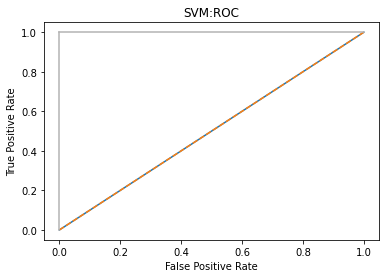

0.5


In [24]:
    score1 = predicted
    f, t , threshold = roc_curve(y_test, score1)
    pyplot.title('SVM:ROC')
    pyplot.plot(f, t)
    pyplot.plot([0, 1], ls="--")
    pyplot.plot([0, 0], [1, 0] , c=".7"), pyplot.plot([1, 1] , c=".7")
    pyplot.ylabel('True Positive Rate')
    pyplot.xlabel('False Positive Rate')
    pyplot.show()
    print(roc_auc_score(y_test, score1))

In [25]:

from sklearn.linear_model import LogisticRegression


In [28]:
modelLR = LogisticRegression(solver='lbfgs')
modelLR.fit(X_train, Y_train)
predictLR = modelLR.predict(x_test)
predictLR

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

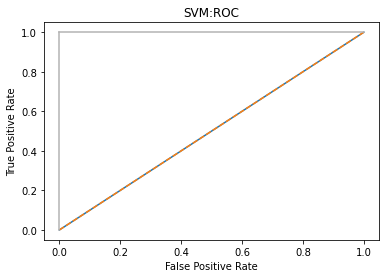

0.5


In [30]:
    score2 = predictLR
    f, t , threshold = roc_curve(y_test, score2)
    pyplot.title('SVM:ROC')
    pyplot.plot(f, t)
    pyplot.plot([0, 1], ls="--")
    pyplot.plot([0, 0], [1, 0] , c=".7"), pyplot.plot([1, 1] , c=".7")
    pyplot.ylabel('True Positive Rate')
    pyplot.xlabel('False Positive Rate')
    pyplot.show()
    print(roc_auc_score(y_test, score2))